In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import os
import analyzer
import columns
import devices
import plots
import prints
import sadzax
sadzax.Out.reconfigure_encoding()
sadzax.Out.clear_future_warning()

In [2]:
device_type = prints.device_picking()
# device_type = 'mon'
dev = device_type
# prints.file_picking(dev)
# data = devices.Pkl.load(dev)
data = analyzer.stack_data(dev)
cols_list = columns.columns_list_maker(dev, data)
cols = columns.columns_analyzer(dev, cols_list)
del cols_list
data = analyzer.pass_the_nan(device_type=device_type, data=data, cols=cols)  # update data_types
data = analyzer.set_dtypes(device_type=device_type, data=data, cols=cols)
# devices.Pkl.save(device_type=device_type, data=data)


Доступны следующие устройства для анализа: 

1. Устройство непрерывного контроля и защиты высоковольтных вводов (nkvv)
2. Устройство контроля изоляции вводов (kiv)
3. Мониторинг устройств непрерывного контроля и защиты высоковольтных вводов (mon)

Выберите № устройства: 3

Выбрано устройство: 
"Мониторинг устройств непрерывного контроля и защиты высоковольтных вводов"
Системный код устройства - "mon"
Доступно 24 файла для соединения данных: 
Файл № 1. upload/mon/22_06/21217004.I
Файл № 2. upload/mon/22_07/21217004.I
Файл № 3. upload/mon/22_08/21217004.I
Файл № 4. upload/mon/22_09/21217004.I
Файл № 5. upload/mon/22_10/21217004.I
Файл № 6. upload/mon/22_11/21217004.I
Файл № 7. upload/mon/22_12/21217004.I
Файл № 8. upload/mon/23_01/21217004.I
Файл № 9. upload/mon/Данные по АТ-1, АТ-2.АТ-3.АТ-4(Свободненская ТЭС)/АТ-1/23_02/18217006.I
Файл № 10. upload/mon/Данные по АТ-1, АТ-2.АТ-3.АТ-4(Свободненская ТЭС)/АТ-1/23_03/18217006.I
Файл № 11. upload/mon/Данные по АТ-1, АТ-2.АТ-3.АТ-4(Свободнен

ValueError: time data "25.11.2022 1178" doesn't match format "%d.%m.%Y %H:%M:%S", at position 15548. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [3]:
prints.total_log_counter(dev, data)



          Подсчёт общего количества записей...
Общее число записей в журнале измерений составило 302305


In [4]:

values_time_analyzer = analyzer.values_time_analyzer(dev, data, time_sequence_min=1, inaccuracy_sec=3)
prints.values_time_analyzer(dev, data, log=values_time_analyzer)




          Анализ периодичности и неразрывности измерений...
Выявлено 61 нарушений периодов измерений
        Строка в БД      Дата  Время Дата след. Время след.         Разница
237             236  21.06.22  16.26   21.06.22       16.26 0 days 00:00:33
240             239  21.06.22  16.28   21.06.22       16.30 0 days 00:01:31
10591         10590  28.06.22  21.00   28.06.22       21.00 0 days 00:00:03
13651         13650  30.06.22  23.59   01.07.22       00.01 0 days 00:02:00
32879         32878  14.07.22  08.28   14.07.22       08.28 0 days 00:00:33
...             ...       ...    ...        ...         ...             ...
206045       206044  11.11.22  14.43   11.11.22       14.44 0 days 00:00:51
206046       206045  11.11.22  14.44   11.11.22       14.44 0 days 00:00:09
206134       206133  11.11.22  16.11   11.11.22       16.14 0 days 00:03:00
233960       233959  30.11.22  23.59   01.12.22       00.01 0 days 00:02:00
278599       278598  31.12.22  23.59   01.01.23       00.01 0

In [5]:

values_time_slicer = analyzer.values_time_slicer(dev, data, values_time_analyzer, min_values_required=150)
data = prints.values_time_slicer(dev, data, log=values_time_slicer)




          Выбор неразрывного периода для анализа...
По заданным параметрам найден 1 срез данных
Срез данных № 1. Всего 302305 записей с 21.06.22 12:30 по 17.01.23 11:06
Срез данных принят к анализу


In [6]:

total_nan_counter = analyzer.total_nan_counter(dev, data, false_data_percentage=30.0)
prints.total_nan_counter(dev, data, false_data_percentage=30.0, log=total_nan_counter)




          Анализ периодов массовой некорректности измерений...

 Выявлено 13768 замеров с некорректными данными (там, где за один замер зафиксировано более 30.0% некорректных данных)
Замеры с некорректными данными составили 4.6% от общего числа произведённых замеров
       % сбоя данных в момент замера      Дата  Время
0                               87.0  21.06.22  12.30
1                               87.0  21.06.22  12.31
2                               87.0  21.06.22  12.32
3                               87.0  21.06.22  12.33
4                               87.0  21.06.22  12.34
...                              ...       ...    ...
14091                           69.0  10.11.22  18.52
14092                           69.0  10.11.22  18.53
14093                           69.0  10.11.22  18.54
14094                           69.0  10.11.22  18.55
14095                           69.0  10.11.22  18.56

[13768 rows x 3 columns]




          Анализ трендов...
Анализ корреляции данных ∆C от температуры воздуха (при корреляции изменения на графике синхронны)


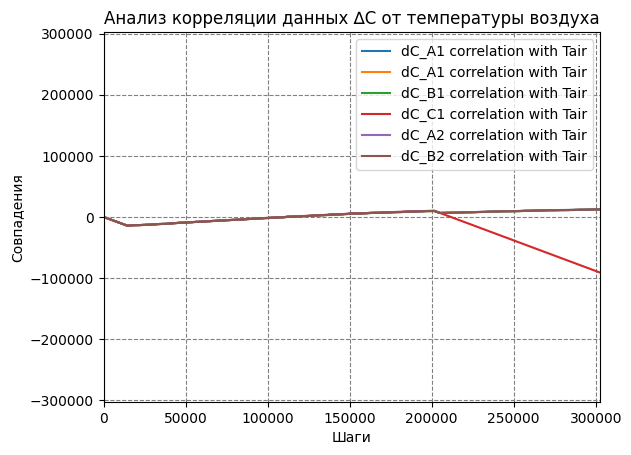

In [7]:

ex1 = '∆C'
ex2 = '∆tg'
prints.info('Анализ трендов')

print(f'Анализ корреляции данных {ex1} от температуры воздуха (при корреляции изменения на графике синхронны)')
plots.correlation_plot(filter_list1=[ex1], filter_list2=['tair'], device_type=device_type, data=data, cols=cols,
                       title=f"Анализ корреляции данных {ex1} от температуры воздуха")


Анализ корреляции данных ∆tg от температуры воздуха (при корреляции изменения на графике синхронны)


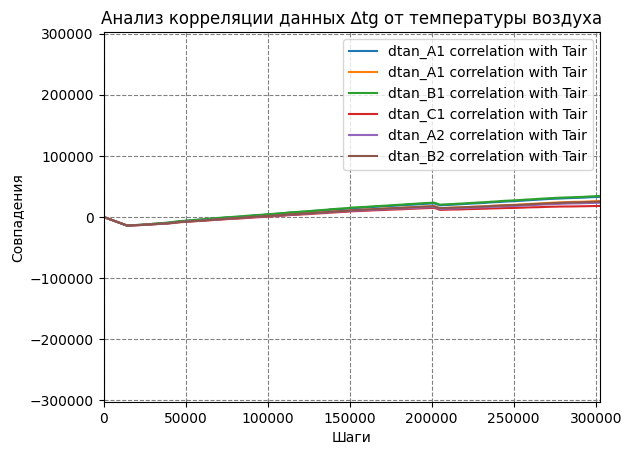

In [8]:

print(f'Анализ корреляции данных {ex2} от температуры воздуха (при корреляции изменения на графике синхронны)')
plots.correlation_plot(filter_list1=[ex2], filter_list2=['tair'], device_type=device_type, data=data, cols=cols,
                       title=f"Анализ корреляции данных {ex2} от температуры воздуха")


Среднее значение по ∆C: 
Среднее по модулю по dC_A1 составило 2.085
Среднее по модулю по dC_B1 составило 0.785
Среднее по модулю по dC_C1 составило 1.574
Среднее по модулю по dC_A2 составило 0.645
Среднее по модулю по dC_B2 составило 0.848
Среднее по модулю по dC_C2 составило 0.885
Распределение значений ∆C (гистограмма): 


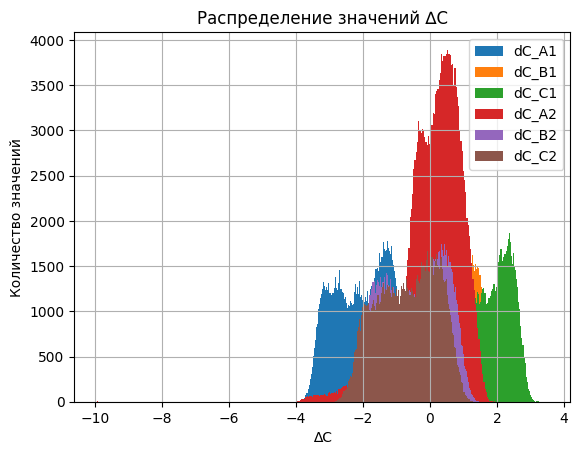

In [9]:

prints.average_printer(ex=ex1, data=data, cols=cols, abs_parameter=True)


Среднее значение по ∆tg: 
Среднее по модулю по dtan_A1 составило 0.079
Среднее по модулю по dtan_B1 составило 0.037
Среднее по модулю по dtan_C1 составило 0.033
Среднее по модулю по dtan_A2 составило 7.815
Среднее по модулю по dtan_B2 составило 0.032
Среднее по модулю по dtan_C2 составило 0.031
Распределение значений ∆tg (гистограмма): 


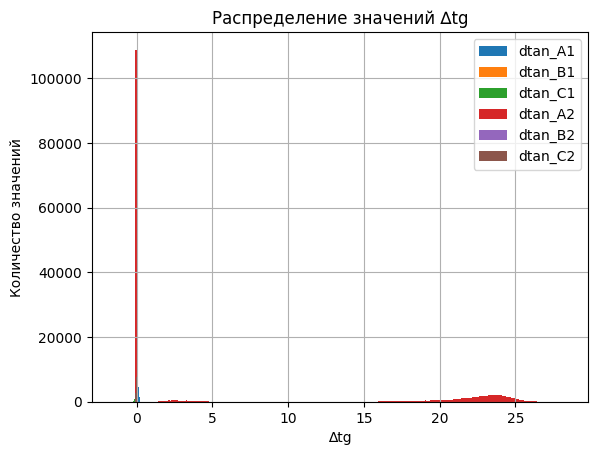

In [10]:

prints.average_printer(ex=ex2, data=data, cols=cols, abs_parameter=True)




          Графики изменения значений напряжений в фазах А, В и С стороны ВН...


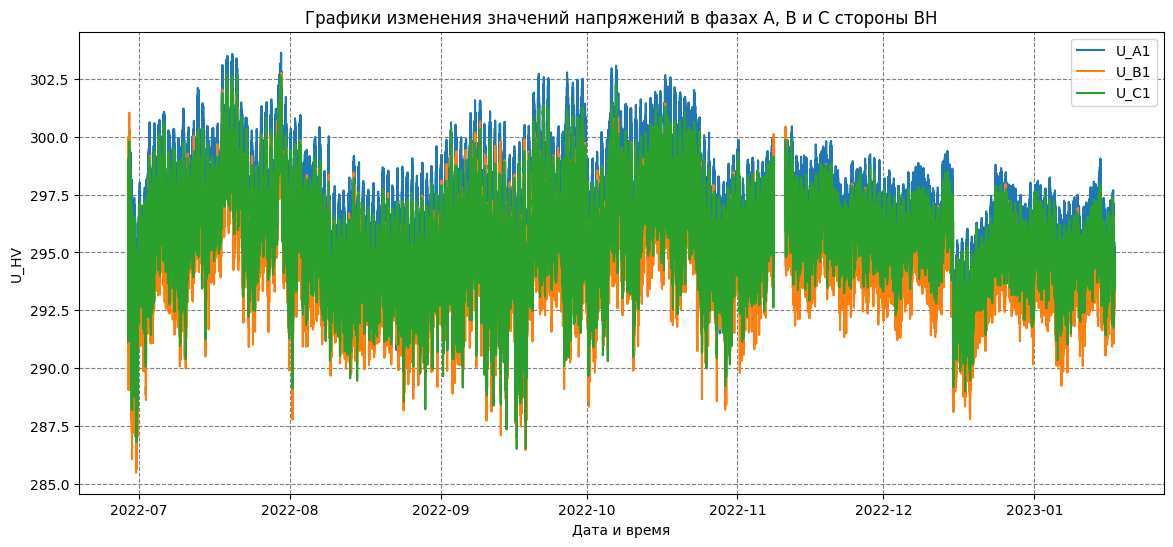

In [11]:

hv1 = 'Графики изменения значений напряжений в фазах А, В и С стороны ВН'
prints.print_flat_graph(input_y=['U_HV'], device_type=dev, data=data, cols=cols, title=hv1)




          Графики изменения активной составляющей токов утечек высоковольтных вводов фаз А, В и С стороны ВН...


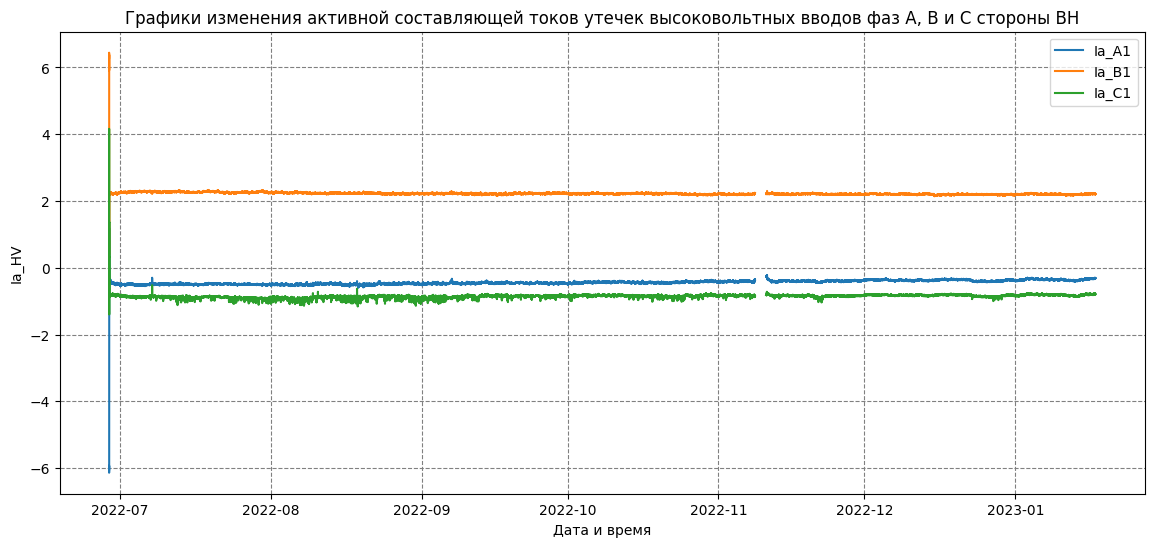

In [13]:

hv2 = 'Графики изменения активной составляющей токов утечек высоковольтных вводов фаз А, В и С стороны ВН'
prints.print_flat_graph(input_y=['Ia_HV'], device_type=dev, data=data, cols=cols, title=hv2)




          Графики изменения реактивной составляющей токов утечек высоковольтных вводов фаз А, В и С стороны ВН...


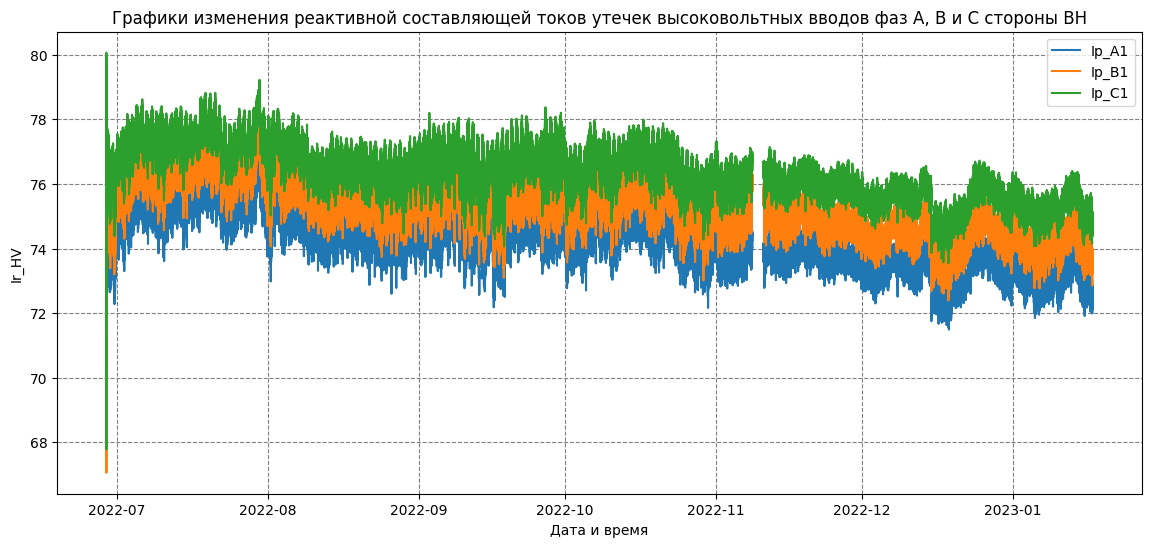

In [14]:

hv3 = 'Графики изменения реактивной составляющей токов утечек высоковольтных вводов фаз А, В и С стороны ВН'
prints.print_flat_graph(input_y=['Ir_HV'], device_type=dev, data=data, cols=cols, title=hv3)




          Графики изменения значений tgδ высоковольтных вводов фаз А, В и С стороны ВН...


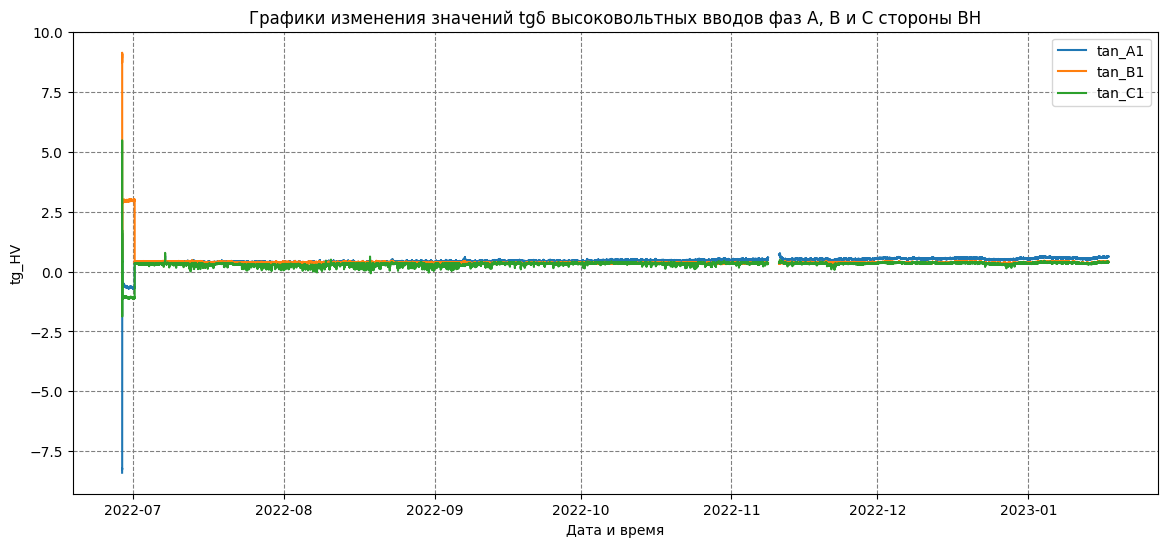

In [15]:

hv4 = 'Графики изменения значений tgδ высоковольтных вводов фаз А, В и С стороны ВН'
prints.print_flat_graph(input_y=['tg_HV'], device_type=dev, data=data, cols=cols, title=hv4)




          Графики изменения значений емкостей С1 высоковольтных вводов фаз А, В и С стороны ВН...


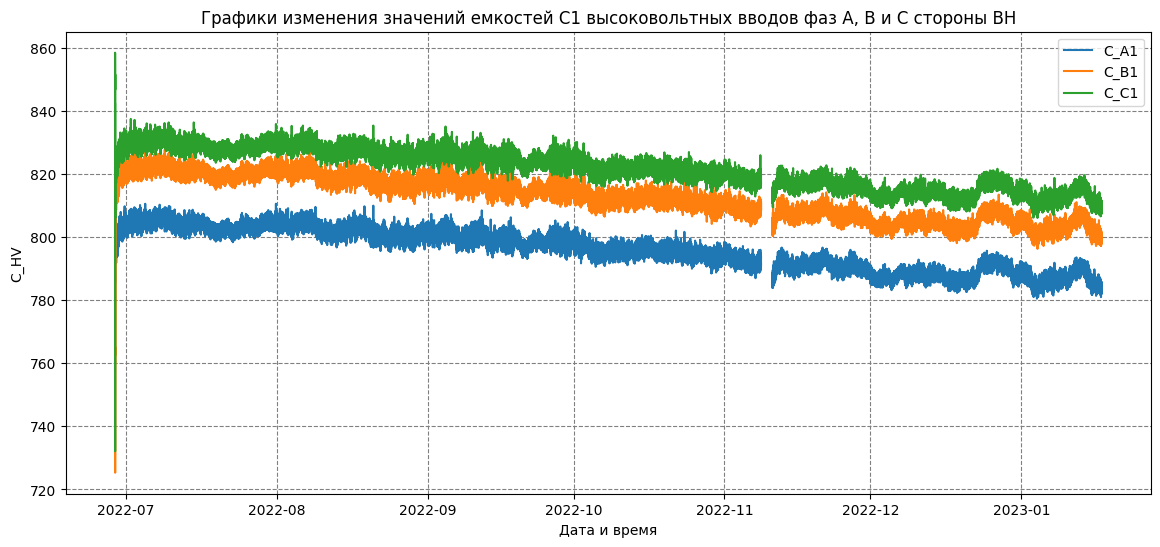

In [16]:

hv5 = 'Графики изменения значений емкостей С1 высоковольтных вводов фаз А, В и С стороны ВН'
prints.print_flat_graph(input_y=['C_HV'], device_type=dev, data=data, cols=cols, title=hv5)




          Графики изменения значений ∆tgδ (изменение tgδ относительно начальных значений) высоковольтных вводов фаз А, В и С стороны ВН...


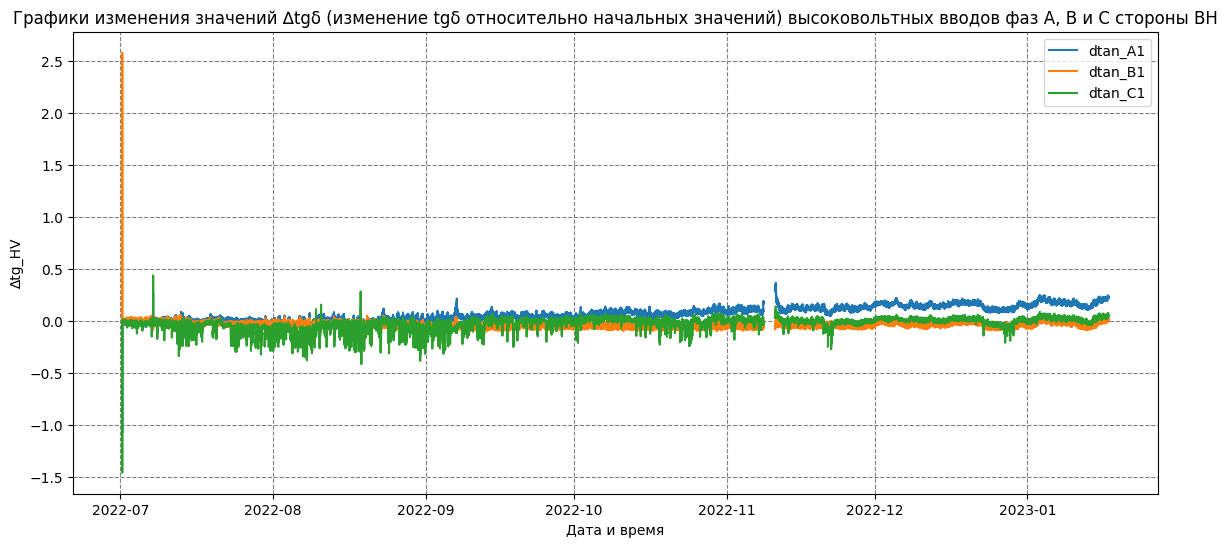

In [17]:

hv6 = 'Графики изменения значений ∆tgδ (изменение tgδ относительно начальных значений) высоковольтных вводов' \
      ' фаз А, В и С стороны ВН'
prints.print_flat_graph(input_y=['∆tg_HV'], device_type=dev, data=data, cols=cols, title=hv6)




          Графики изменения значений ∆C/C1 (изменение емкостей С1 относительно начальных значений) высоковольтных вводов фаз А, В и С стороны ВН...


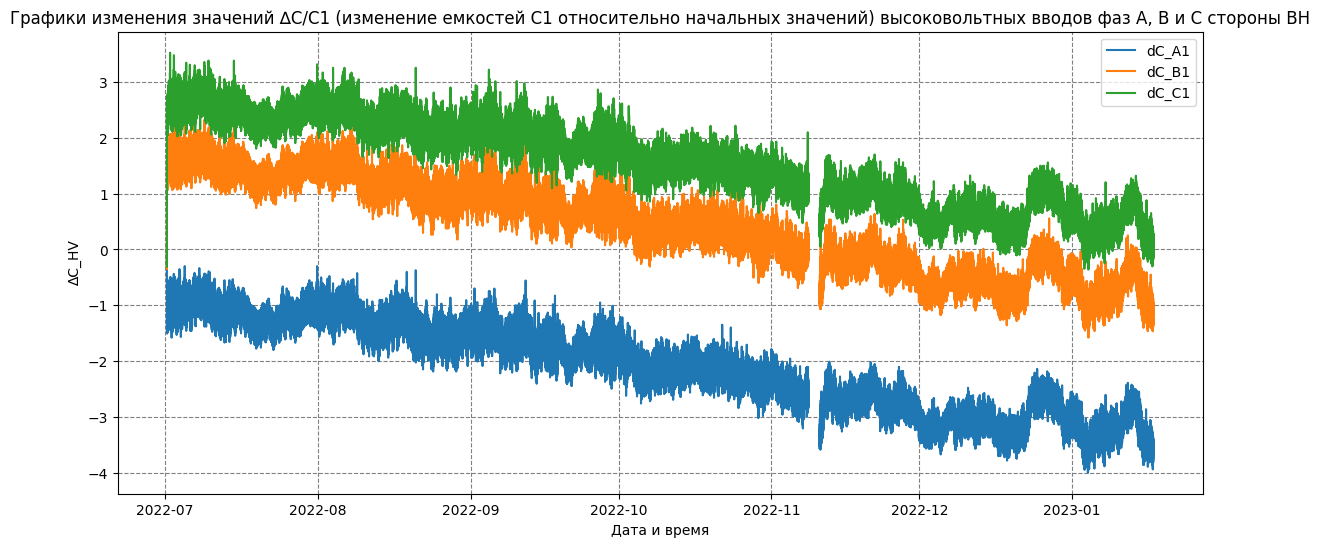

In [18]:

hv7 = 'Графики изменения значений ∆C/C1 (изменение емкостей С1 относительно начальных значений) высоковольтных вводов' \
      ' фаз А, В и С стороны ВН'
prints.print_flat_graph(input_y=['∆C_HV'], device_type=dev, data=data, cols=cols, title=hv7)




          Графики изменения значений напряжений в фазах А, В и С стороны СН...


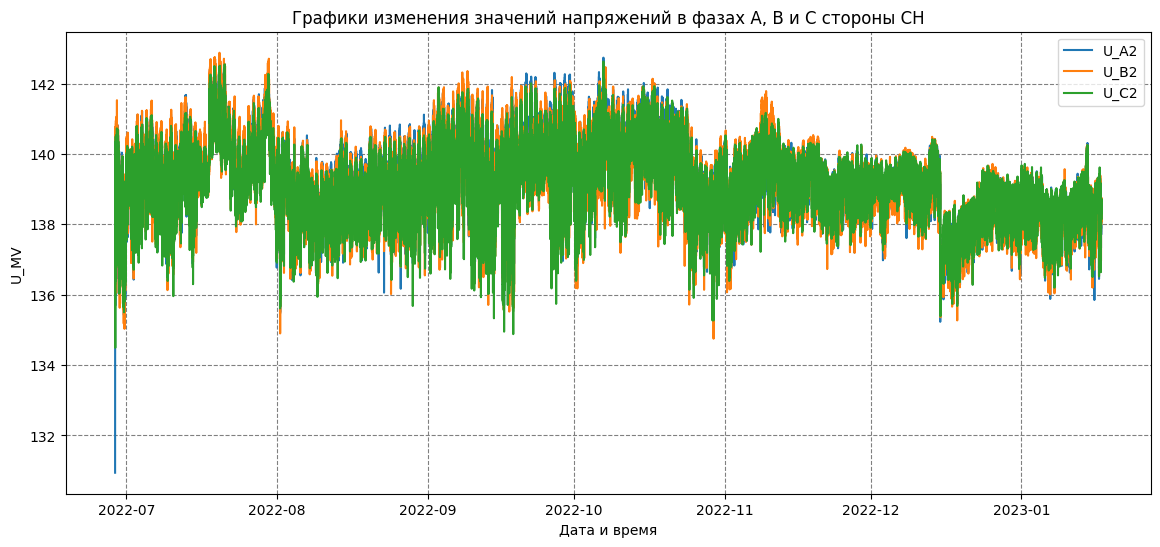

In [23]:
mv1 = 'Графики изменения значений напряжений в фазах А, В и С стороны СН'
prints.print_flat_graph(input_y=['U_MV'], device_type=dev, data=data, cols=cols, title=mv1)




          Графики изменения активной составляющей токов утечек высоковольтных вводов фаз А, В и С стороны СН...


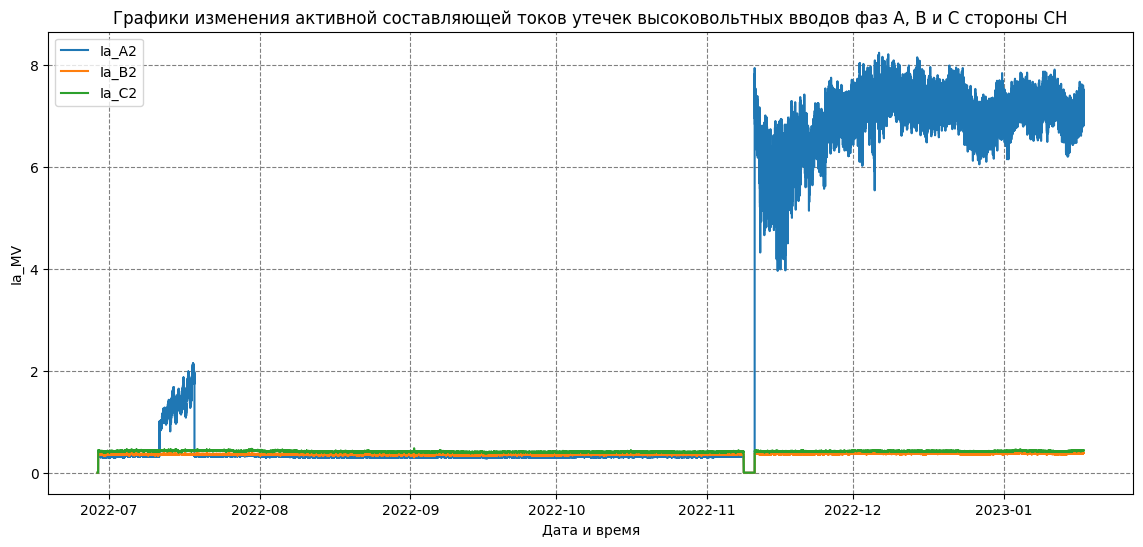

In [24]:

mv2 = 'Графики изменения активной составляющей токов утечек высоковольтных вводов фаз А, В и С стороны СН'
prints.print_flat_graph(input_y=['Ia_MV'], device_type=dev, data=data, cols=cols, title=mv2)




          Графики изменения реактивной составляющей токов утечек высоковольтных вводов фаз А, В и С стороны СН...


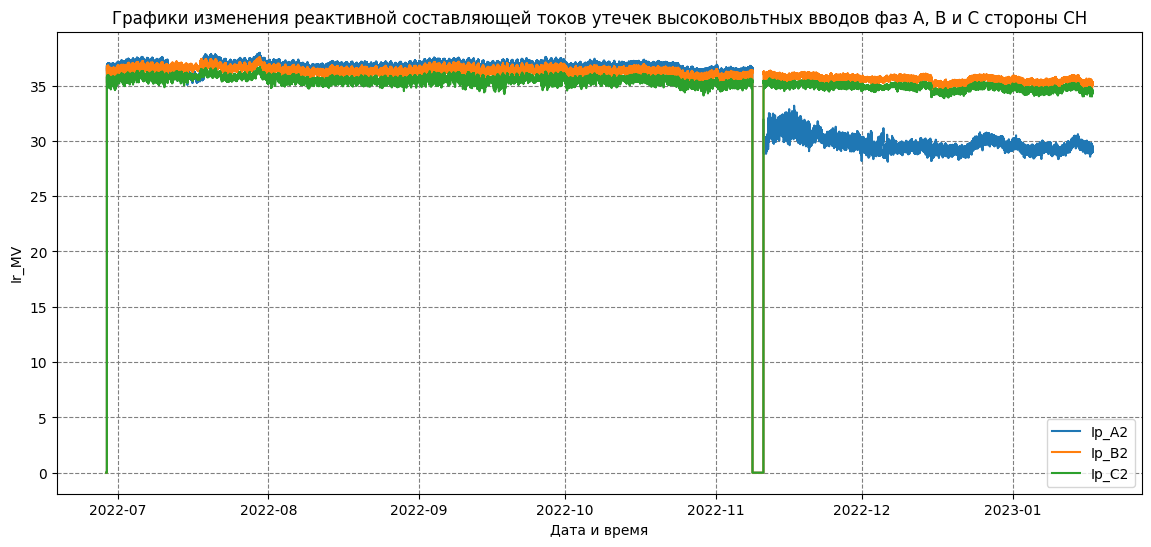

In [25]:

mv3 = 'Графики изменения реактивной составляющей токов утечек высоковольтных вводов фаз А, В и С стороны СН'
prints.print_flat_graph(input_y=['Ir_MV'], device_type=dev, data=data, cols=cols, title=mv3)




          Графики изменения значений tgδ высоковольтных вводов фаз А, В и С стороны СН...


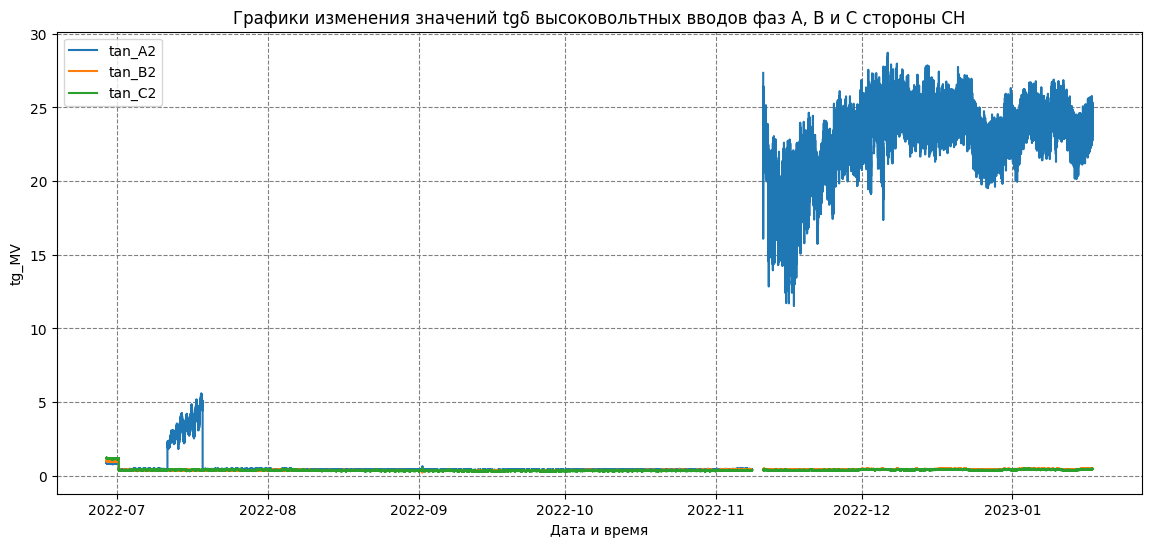

In [26]:

mv4 = 'Графики изменения значений tgδ высоковольтных вводов фаз А, В и С стороны СН'
prints.print_flat_graph(input_y=['tg_MV'], device_type=dev, data=data, cols=cols, title=mv4)




          Графики изменения значений емкостей С1 высоковольтных вводов фаз А, В и С стороны СН...


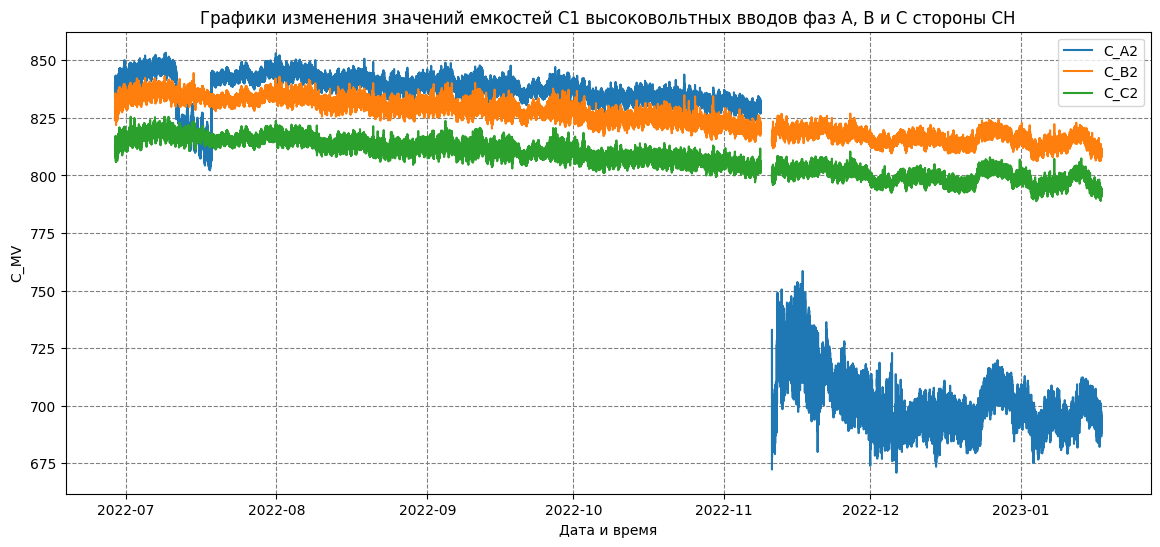

In [27]:

mv5 = 'Графики изменения значений емкостей С1 высоковольтных вводов фаз А, В и С стороны СН'
prints.print_flat_graph(input_y=['C_MV'], device_type=dev, data=data, cols=cols, title=mv5)




          Графики изменения значений ∆tgδ (изменение tgδ относительно начальных значений) высоковольтных вводов фаз А, В и С стороны СН...


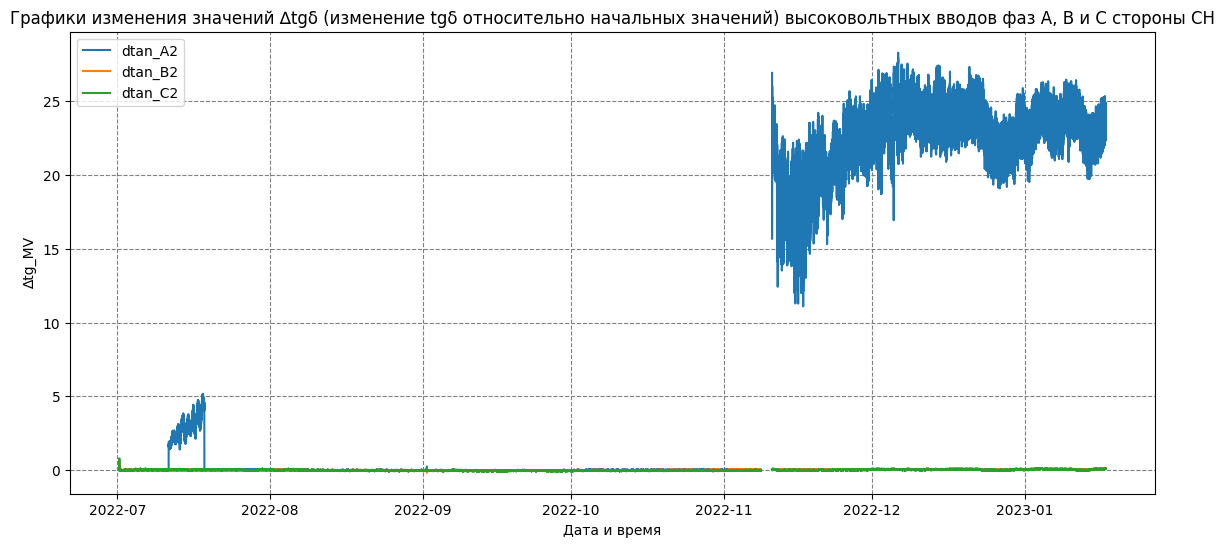

In [28]:

mv6 = 'Графики изменения значений ∆tgδ (изменение tgδ относительно начальных значений) высоковольтных вводов' \
      ' фаз А, В и С стороны СН'
prints.print_flat_graph(input_y=['∆tg_MV'], device_type=dev, data=data, cols=cols, title=mv6)




          Графики изменения значений ∆C/C1 (изменение емкостей С1 относительно начальных значений) высоковольтных вводов фаз А, В и С стороны СН...


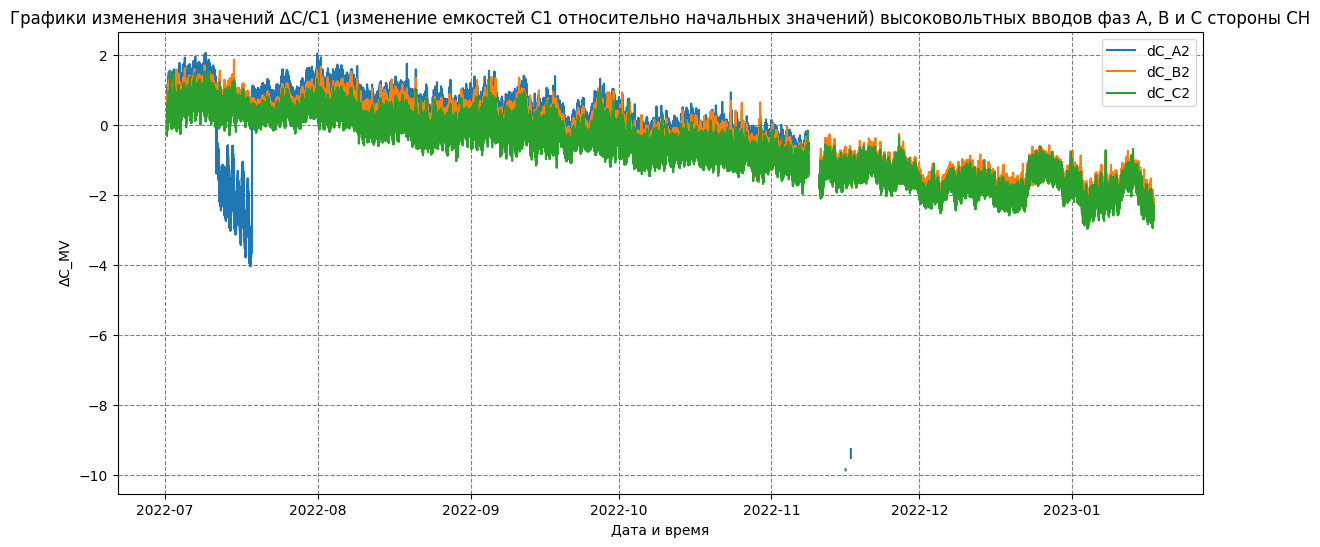

In [29]:

mv7 = 'Графики изменения значений ∆C/C1 (изменение емкостей С1 относительно начальных значений) высоковольтных вводов' \
      ' фаз А, В и С стороны СН'
prints.print_flat_graph(input_y=['∆C_MV'], device_type=dev, data=data, cols=cols, title=mv7)
